Task 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os


In [3]:
filenames = [
    'Tomatoes.csv',
    'Sorghum.csv',
    'Potatoes (Irish).csv',
    'Peas (fresh).csv',
    'Oranges (big size).csv',
    'Maize.csv',
    'Chili (red).csv',
    'Cassava.csv',
    'Beans (dry).csv'
]


In [8]:
directory = '/content/drive/MyDrive/Final Exam/data'

In [14]:
df_list = []

In [19]:
for filename in filenames:
    file_path = os.path.join(directory, filename)
    try:
        df = pd.read_csv(file_path)
        print(f"\nProcessing {filename}")
        print(f"Columns: {df.columns.tolist()}")
        if 'mp_year' not in df.columns or 'mp_month' not in df.columns:
            print(f"Columns 'mp_year' or 'mp_month' not found in {filename}.")
            continue
        df['mp_year'] = pd.to_numeric(df['mp_year'], errors='coerce')
        df['mp_month'] = pd.to_numeric(df['mp_month'], errors='coerce')
        df.dropna(subset=['mp_year', 'mp_month'], inplace=True)
        df['mp_year'] = df['mp_year'].astype(int)
        df['mp_month'] = df['mp_month'].astype(int)
        df.rename(columns={'mp_year':'year', 'mp_month':'month'}, inplace=True)
        df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')
        df.dropna(subset=['date'], inplace=True)
        df.set_index('date', inplace=True)
        base_name = filename[:-4]
        good_name = base_name.strip()
        if 'mp_price' not in df.columns:
            print(f"Column 'mp_price' not found in {filename}.")
            continue
        df['mp_price'] = pd.to_numeric(df['mp_price'], errors='coerce')
        df.dropna(subset=['mp_price'], inplace=True)
        df_grouped = df.groupby('date')['mp_price'].mean().rename(good_name)
        df_list.append(df_grouped)

    except Exception as e:
        print(f"An error occurred while processing {file_path}:")
        traceback.print_exc()
if not df_list:
    print("\nNo data was processed. The df_list is empty.")
else:
    combined_df = pd.concat(df_list, axis=1)
    print("\nCombined DataFrame:")
    print(combined_df)


Processing Tomatoes.csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Sorghum.csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Potatoes (Irish).csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Peas (fresh).csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing O

Task 2

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
print("Shape of the DataFrame:", combined_df.shape)

Shape of the DataFrame: (96, 18)


In [23]:
print("\nColumn Names and Data Types:")
print(combined_df.dtypes)


Column Names and Data Types:
Tomatoes              float64
Sorghum               float64
Potatoes (Irish)      float64
Peas (fresh)          float64
Oranges (big size)    float64
Maize                 float64
Chili (red)           float64
Cassava               float64
Beans (dry)           float64
Tomatoes              float64
Sorghum               float64
Potatoes (Irish)      float64
Peas (fresh)          float64
Oranges (big size)    float64
Maize                 float64
Chili (red)           float64
Cassava               float64
Beans (dry)           float64
dtype: object


In [24]:
if not isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.index = pd.to_datetime(combined_df.index)
print("\nDate Range:")
print("Start Date:", combined_df.index.min())
print("End Date:", combined_df.index.max())
date_range = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max(), freq='MS')
is_continuous = combined_df.index.equals(date_range)

print("\nIs the date index continuous (monthly) without gaps?", is_continuous)


Date Range:
Start Date: 2008-01-01 00:00:00
End Date: 2015-12-01 00:00:00

Is the date index continuous (monthly) without gaps? True


In [25]:
print("\nMissing Values per Column:")
print(combined_df.isnull().sum())


Missing Values per Column:
Tomatoes              58
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    58
Maize                  0
Chili (red)           58
Cassava                0
Beans (dry)            0
Tomatoes              58
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    58
Maize                  0
Chili (red)           58
Cassava                0
Beans (dry)            0
dtype: int64


In [26]:
print("\nPercentage of Missing Values per Column:")
missing_percentage = combined_df.isnull().mean() * 100
print(missing_percentage)


Percentage of Missing Values per Column:
Tomatoes              60.416667
Sorghum                0.000000
Potatoes (Irish)       0.000000
Peas (fresh)          37.500000
Oranges (big size)    60.416667
Maize                  0.000000
Chili (red)           60.416667
Cassava                0.000000
Beans (dry)            0.000000
Tomatoes              60.416667
Sorghum                0.000000
Potatoes (Irish)       0.000000
Peas (fresh)          37.500000
Oranges (big size)    60.416667
Maize                  0.000000
Chili (red)           60.416667
Cassava                0.000000
Beans (dry)            0.000000
dtype: float64


In [27]:
print("\nDescriptive Statistics:")
summary_stats = combined_df.describe()
print(summary_stats)


Descriptive Statistics:
         Tomatoes     Sorghum  Potatoes (Irish)  Peas (fresh)  \
count   38.000000   96.000000         96.000000     60.000000   
mean   376.446175  275.130178        156.671755    922.292466   
std     56.819252   61.370135         35.260186    228.328475   
min    273.199820  164.921875         97.000000    553.885886   
25%    334.180228  228.739353        130.808064    734.679617   
50%    374.262788  258.348848        150.377180    875.390358   
75%    411.263391  332.083987        183.347528   1043.666008   
max    469.490286  388.809678        245.468424   1499.938600   

       Oranges (big size)       Maize  Chili (red)     Cassava  Beans (dry)  \
count           38.000000   96.000000    38.000000   96.000000    96.000000   
mean           583.524695  227.949904  1129.368683  195.969790   334.083819   
std             77.458279   41.577013   306.620568   35.205063    64.789260   
min            412.980904  145.820312   655.904309  130.102775   219.6975

In [28]:
additional_stats = combined_df.agg(['mean', 'median', 'min', 'max', 'std'])
print("\nAdditional Summary Statistics:")
print(additional_stats)


Additional Summary Statistics:
          Tomatoes     Sorghum  Potatoes (Irish)  Peas (fresh)  \
mean    376.446175  275.130178        156.671755    922.292466   
median  374.262788  258.348848        150.377180    875.390358   
min     273.199820  164.921875         97.000000    553.885886   
max     469.490286  388.809678        245.468424   1499.938600   
std      56.819252   61.370135         35.260186    228.328475   

        Oranges (big size)       Maize  Chili (red)     Cassava  Beans (dry)  \
mean            583.524695  227.949904  1129.368683  195.969790   334.083819   
median          582.115439  225.736949  1056.904008  204.739094   327.908199   
min             412.980904  145.820312   655.904309  130.102775   219.697584   
max             726.086930  335.986608  1952.848602  260.887844   530.042987   
std              77.458279   41.577013   306.620568   35.205063    64.789260   

          Tomatoes     Sorghum  Potatoes (Irish)  Peas (fresh)  \
mean    376.446175  275.

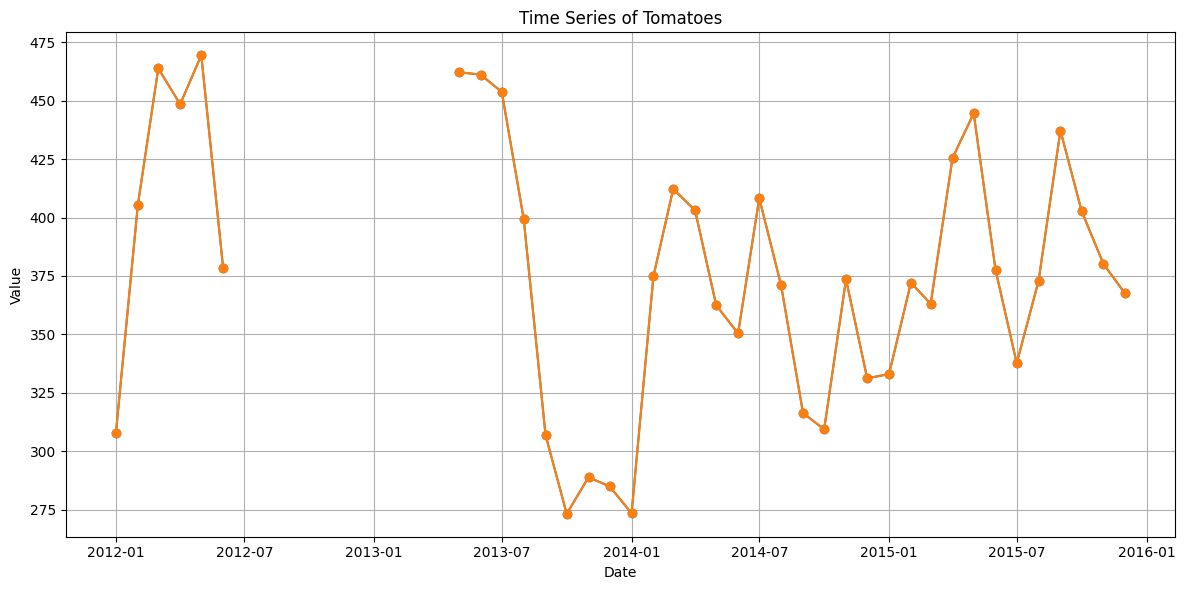

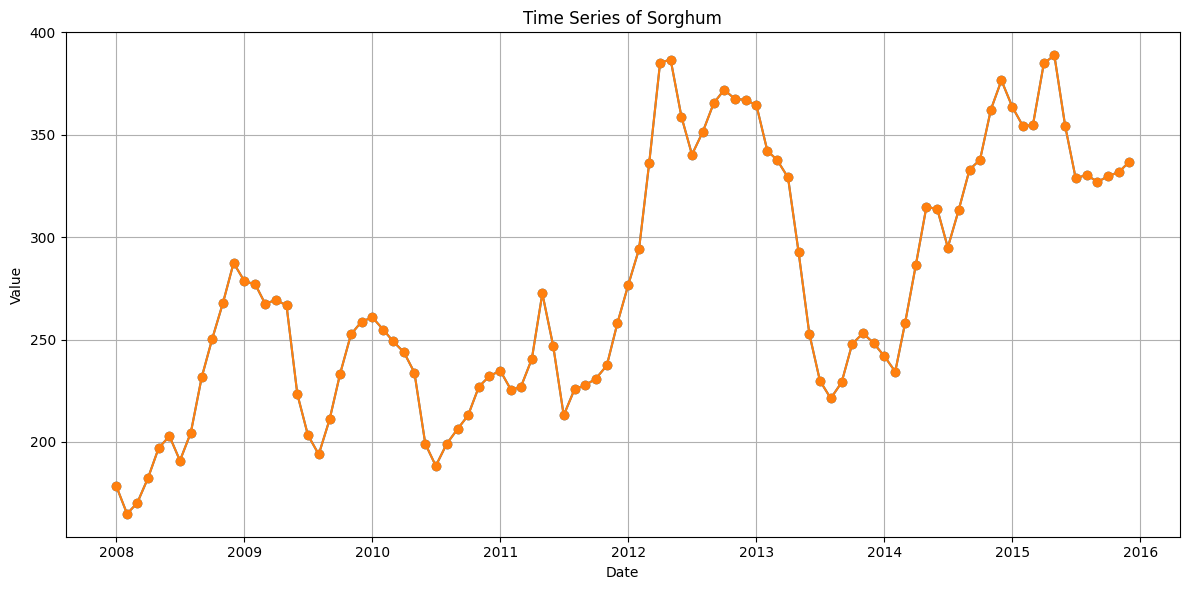

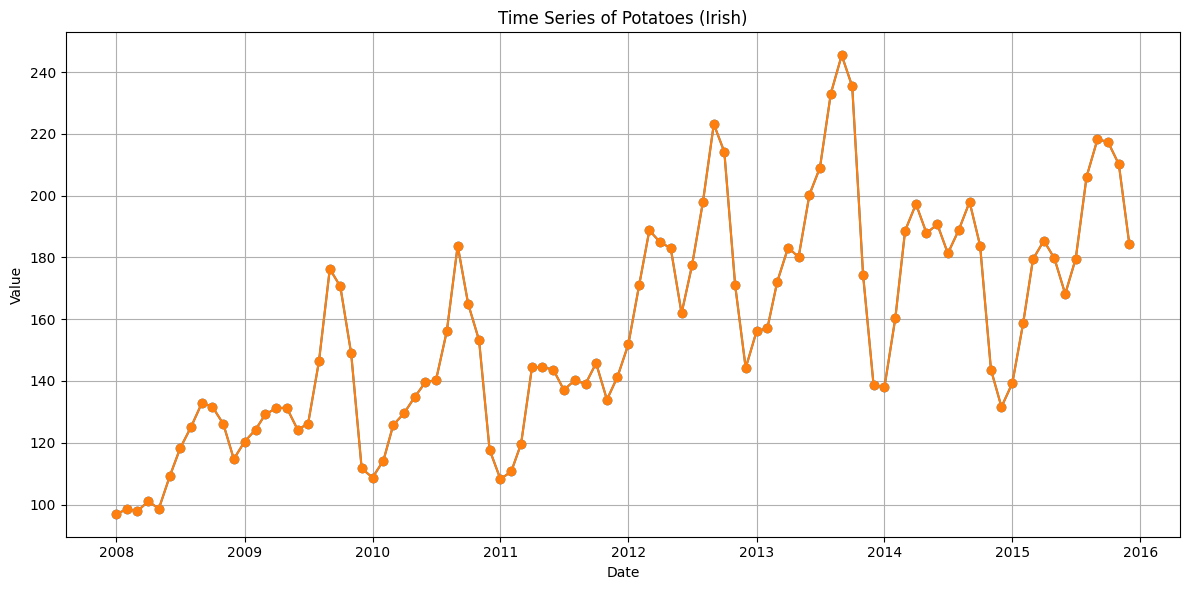

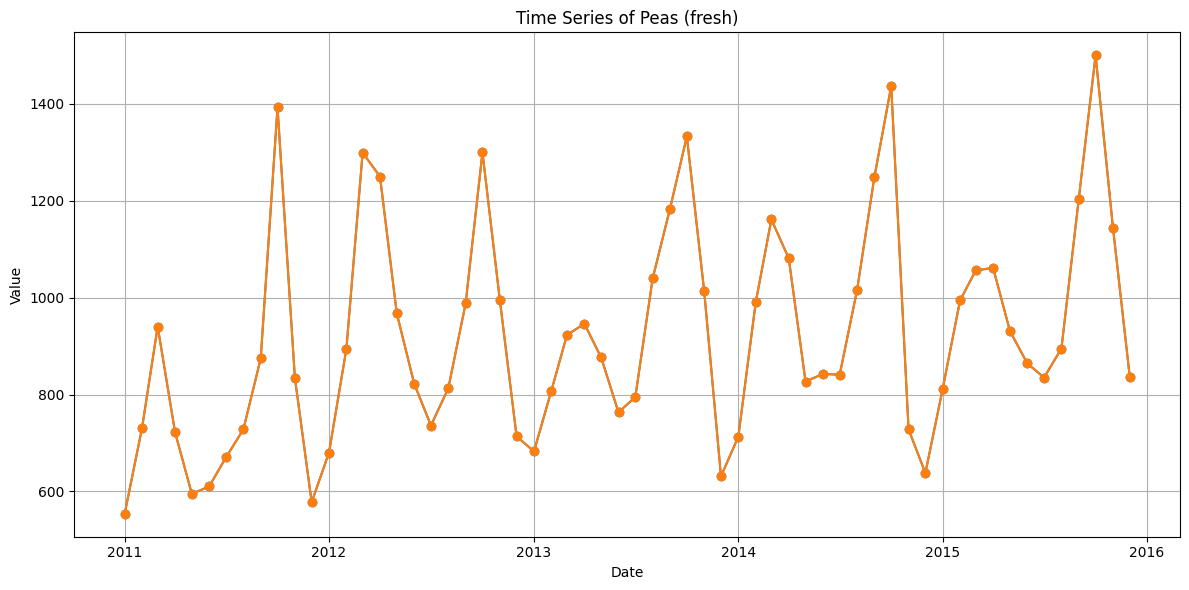

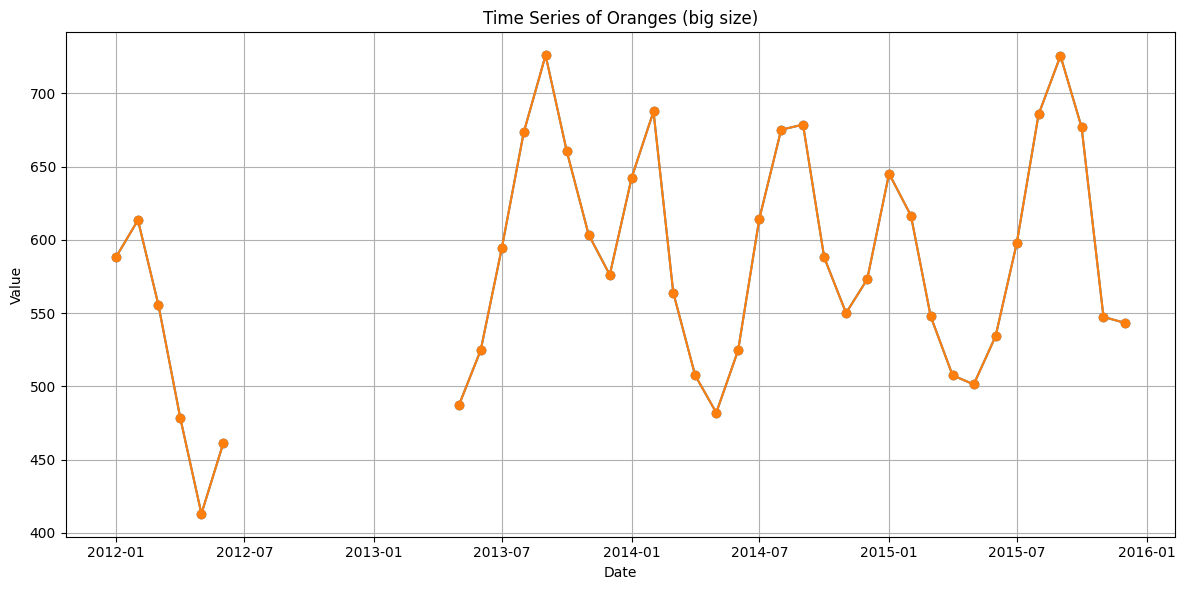

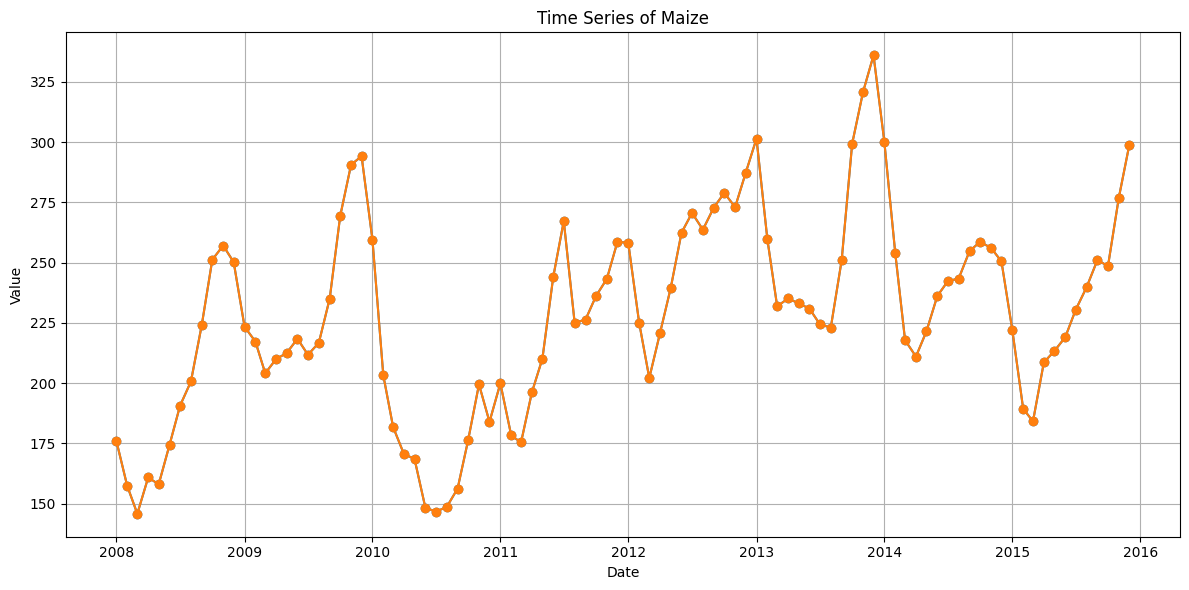

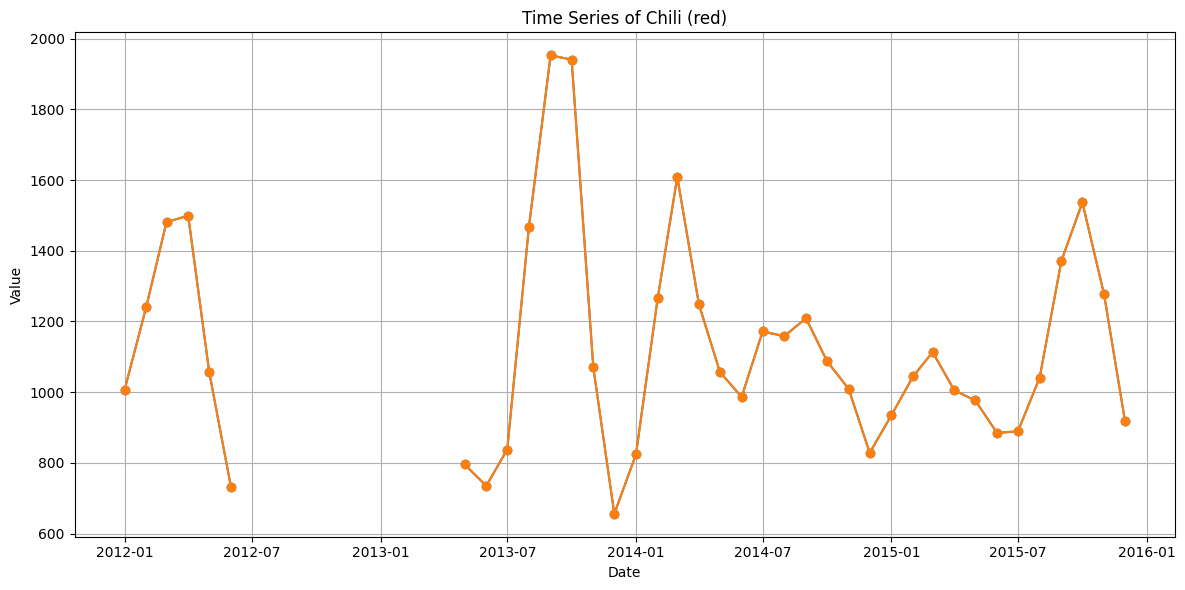

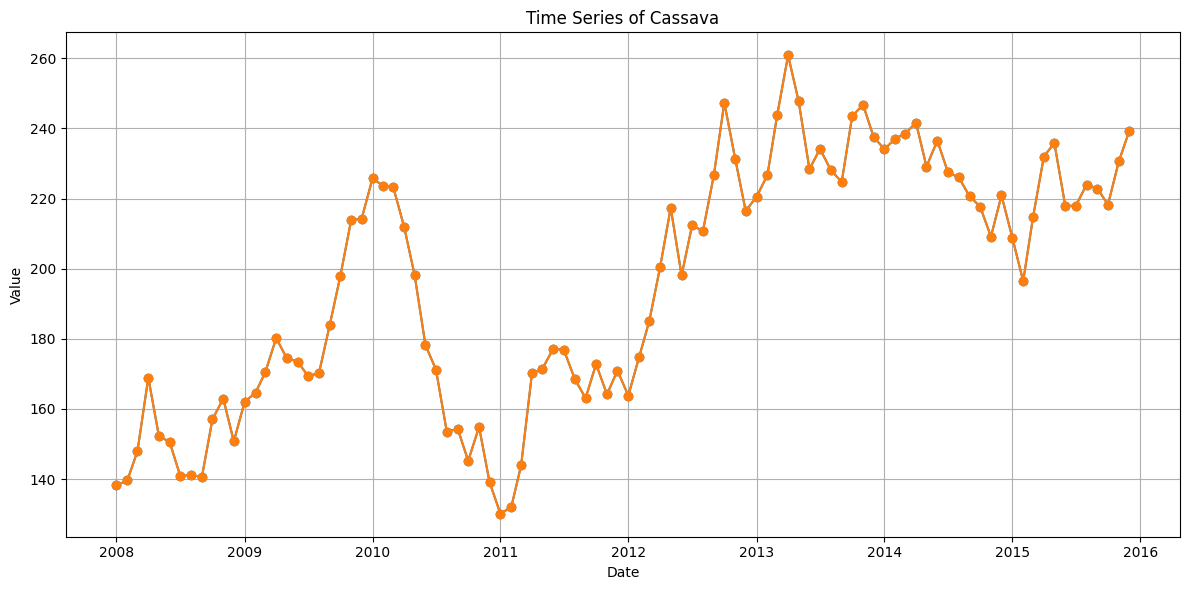

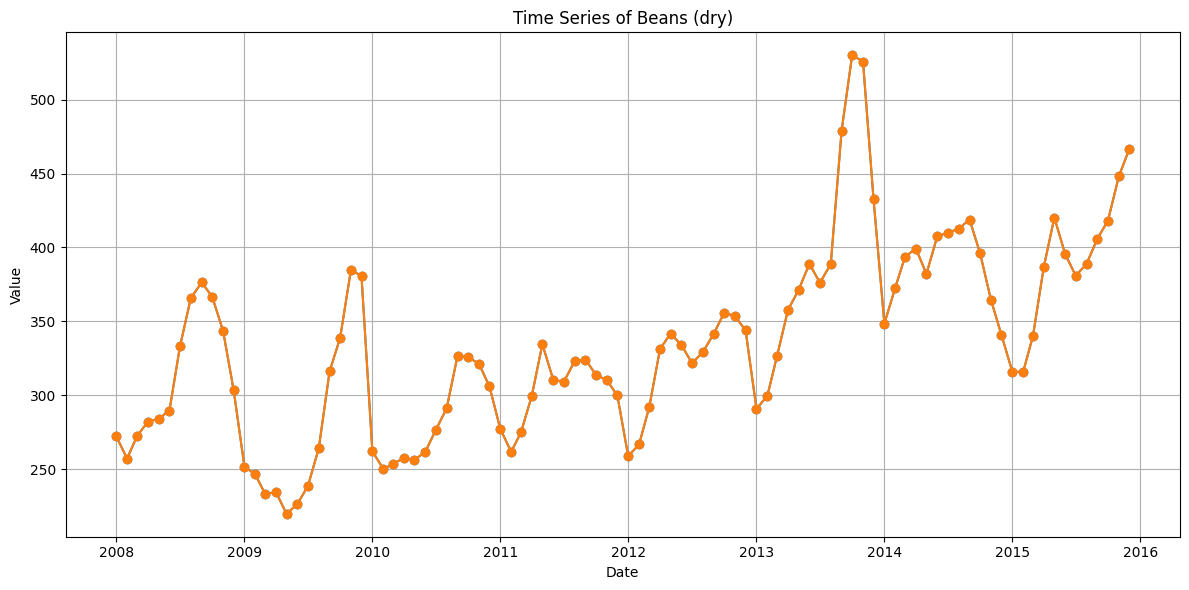

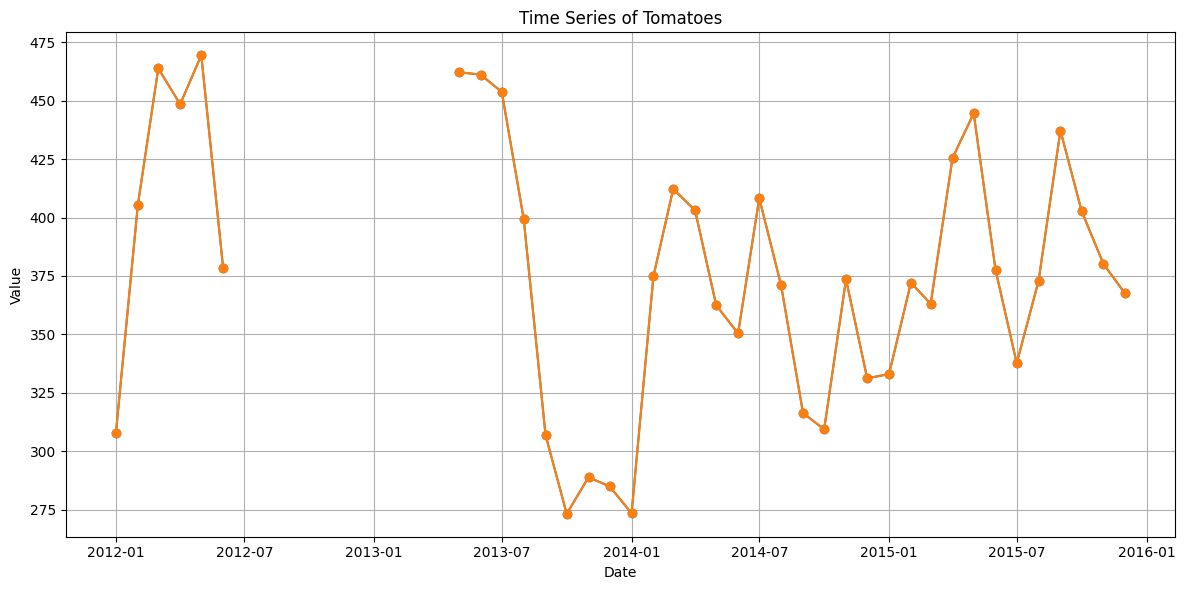

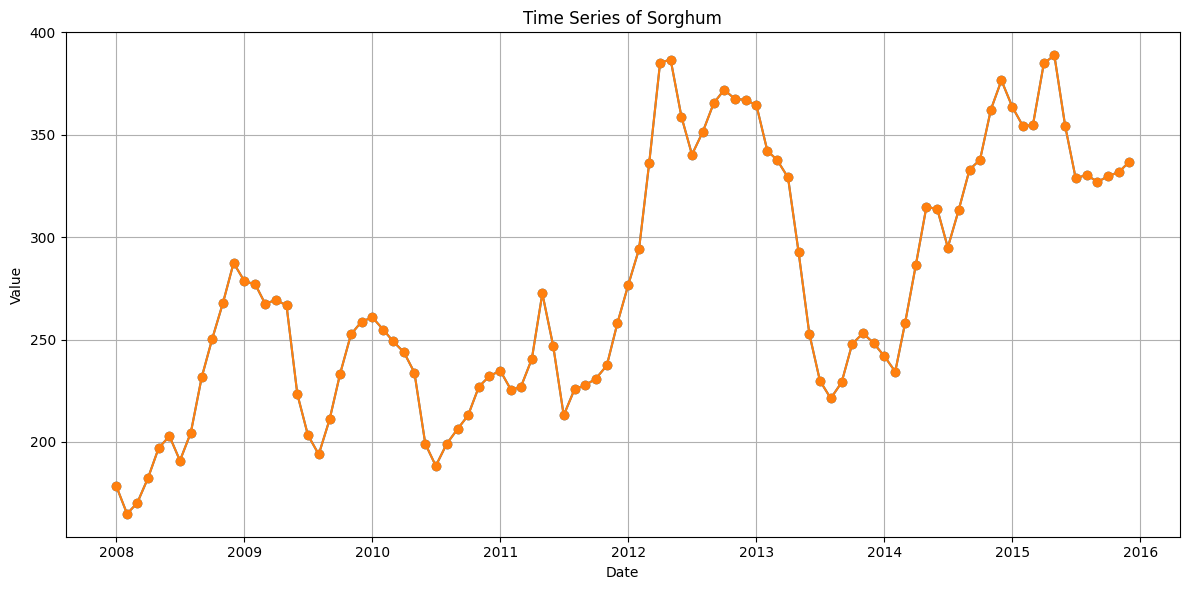

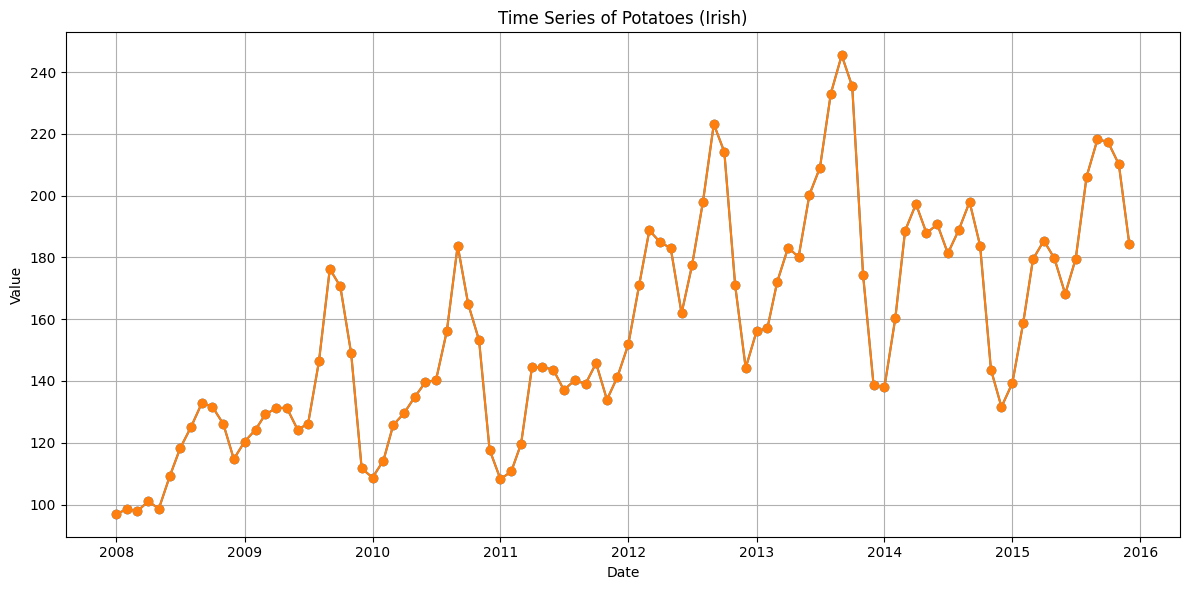

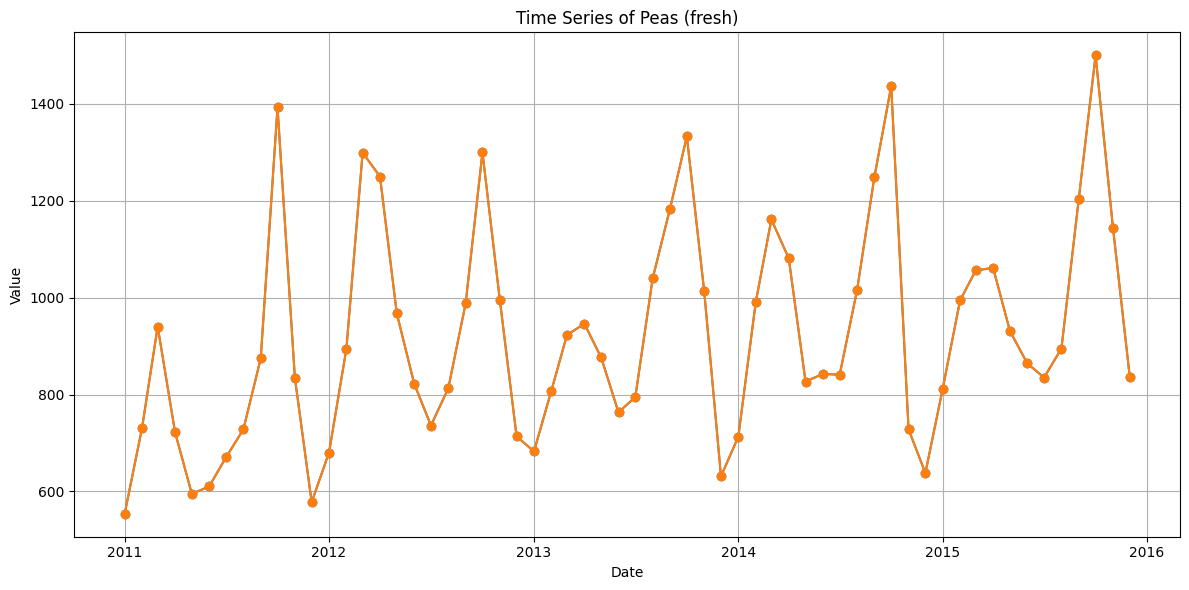

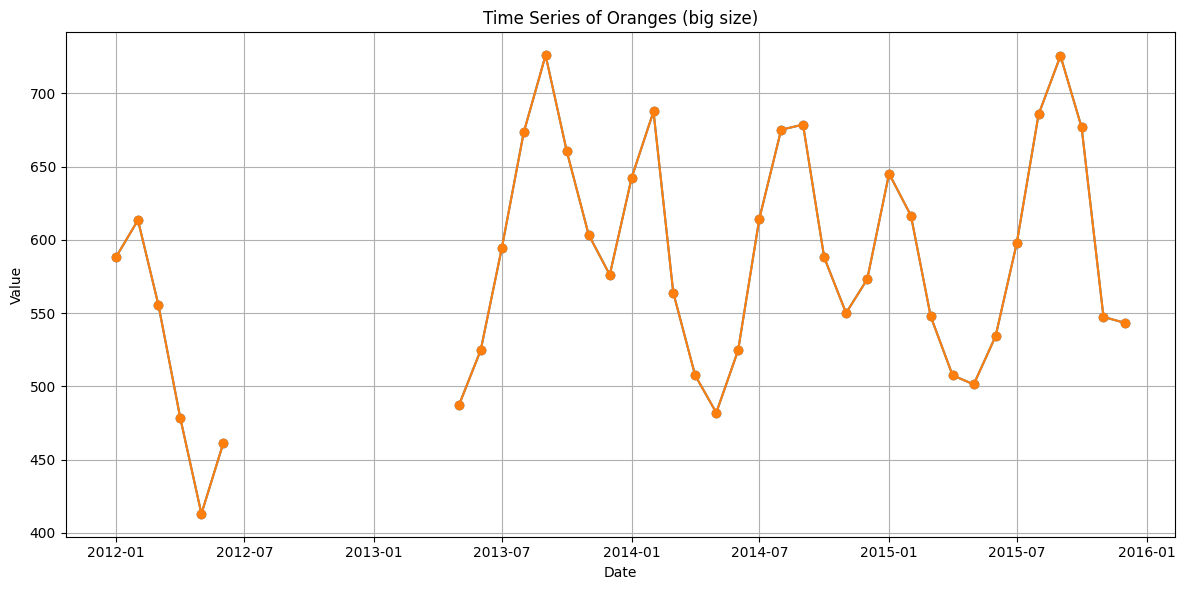

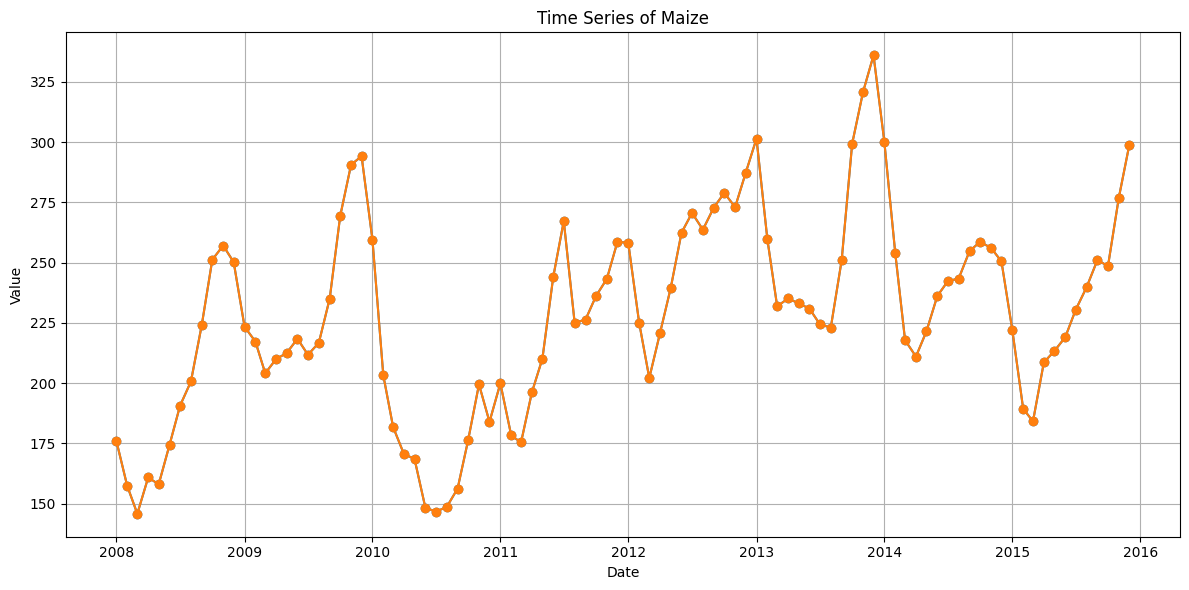

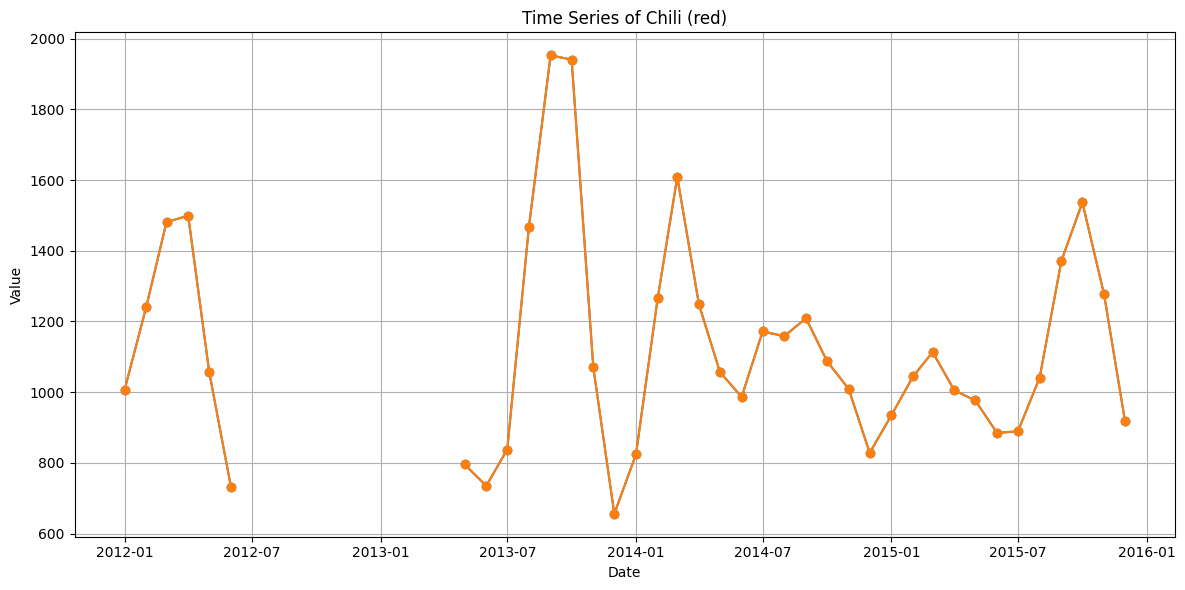

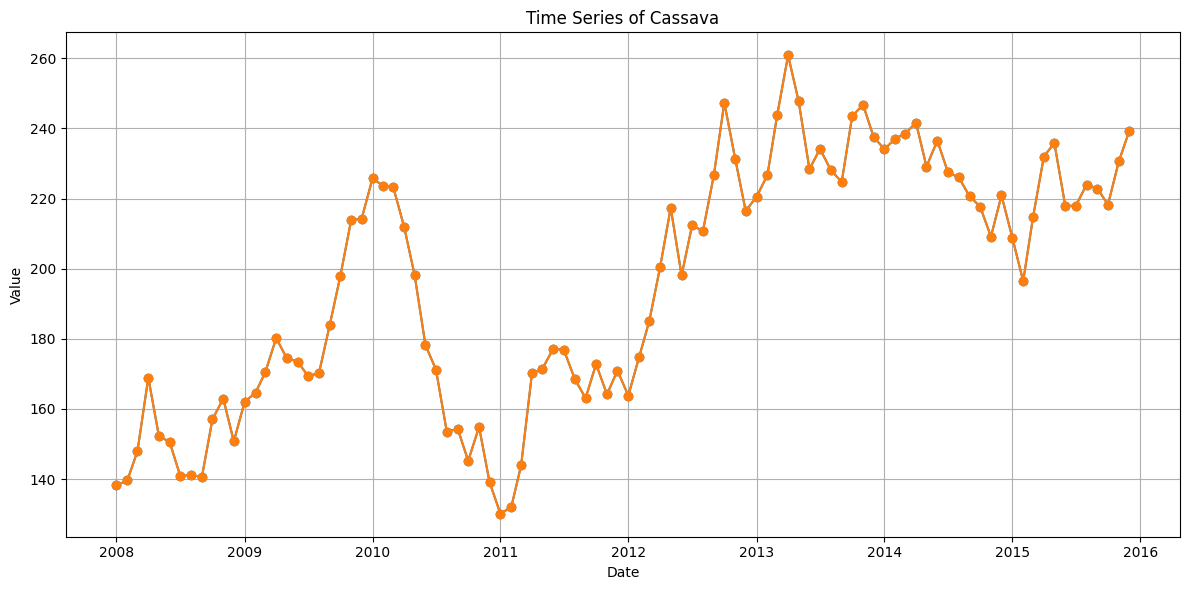

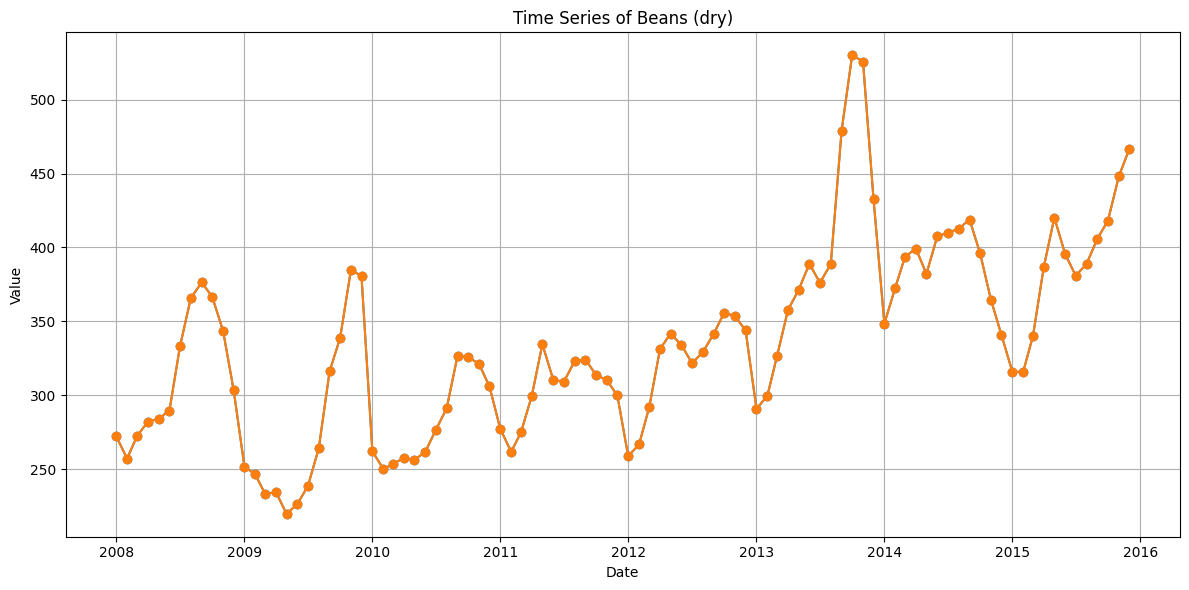

In [30]:
import matplotlib.dates as mdates
for column in combined_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df.index, combined_df[column], marker='o')
    plt.title(f"Time Series of {column}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing Tomatoes.csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Sorghum.csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Potatoes (Irish).csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Peas (fresh).csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cu

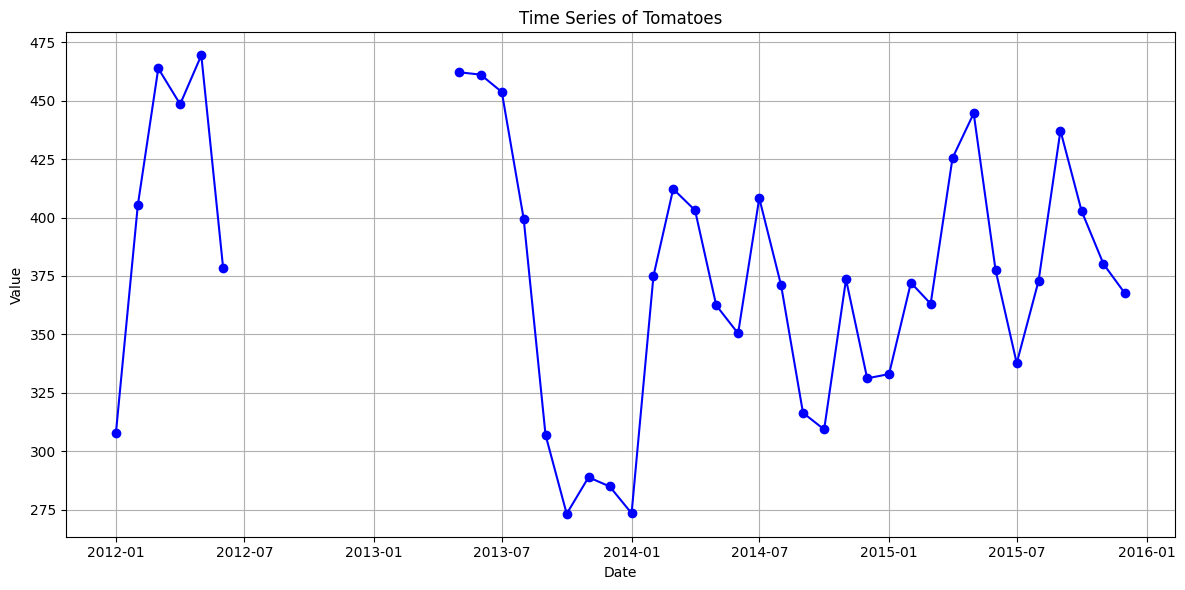

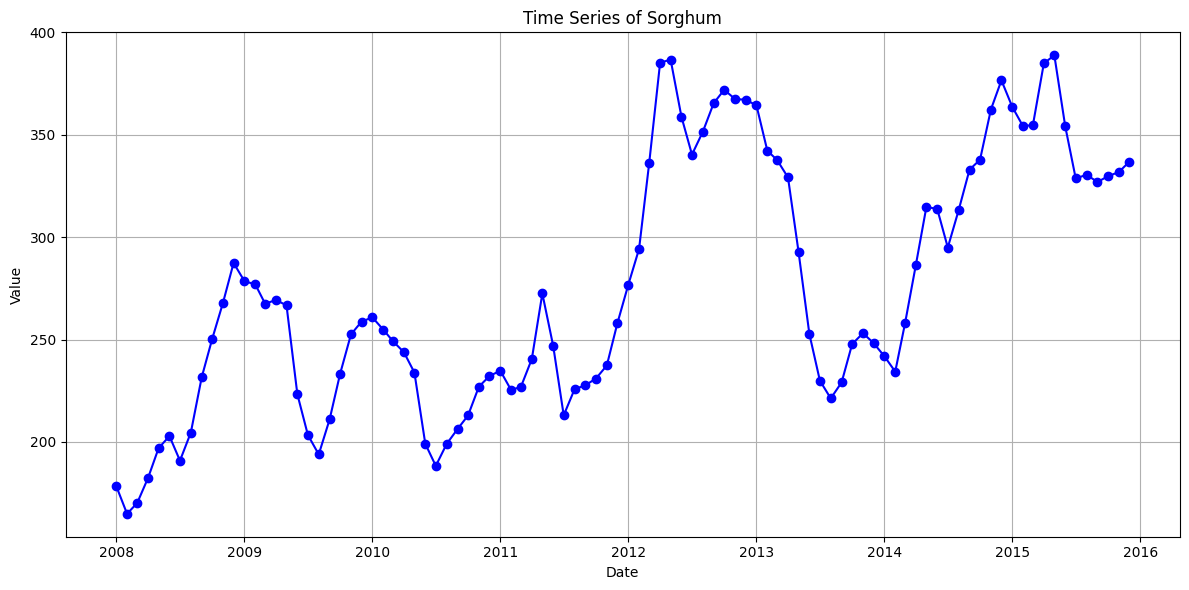

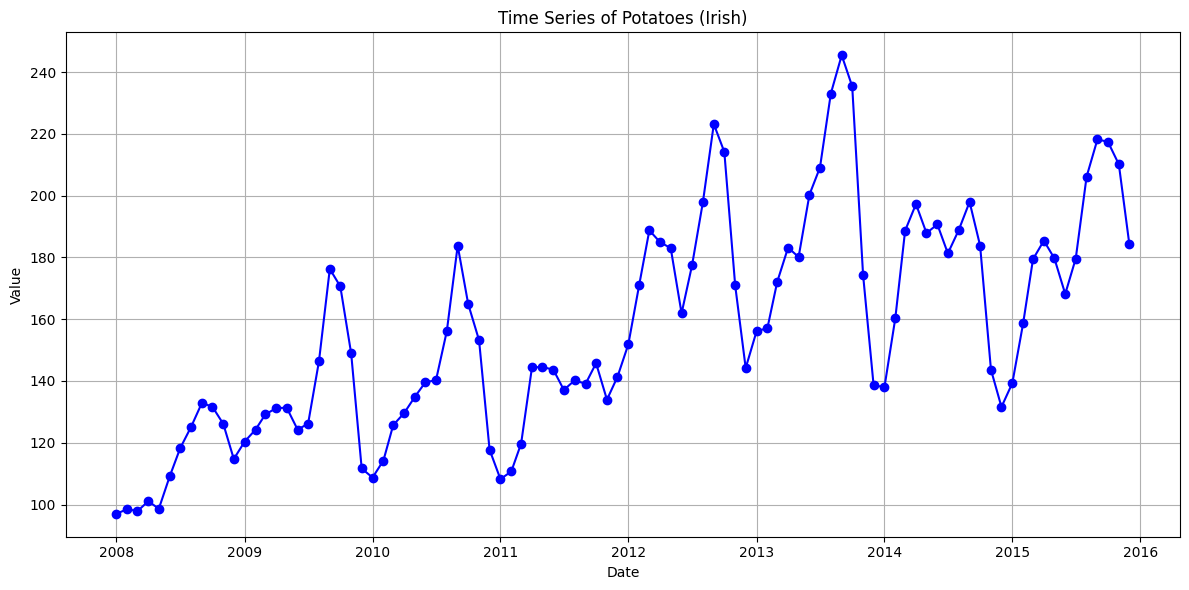

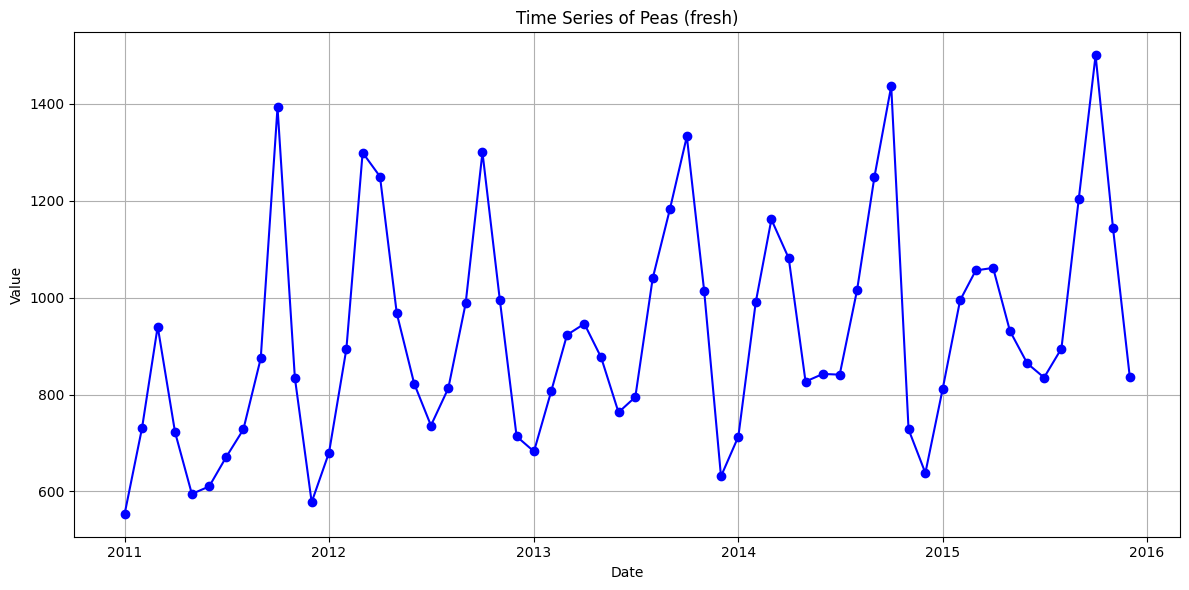

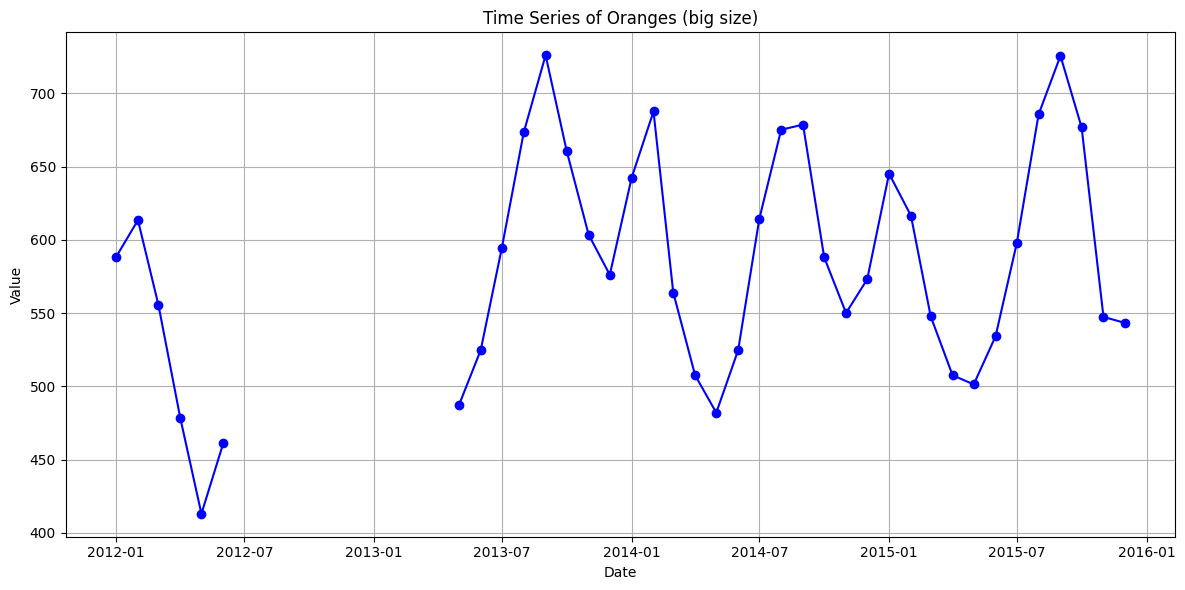

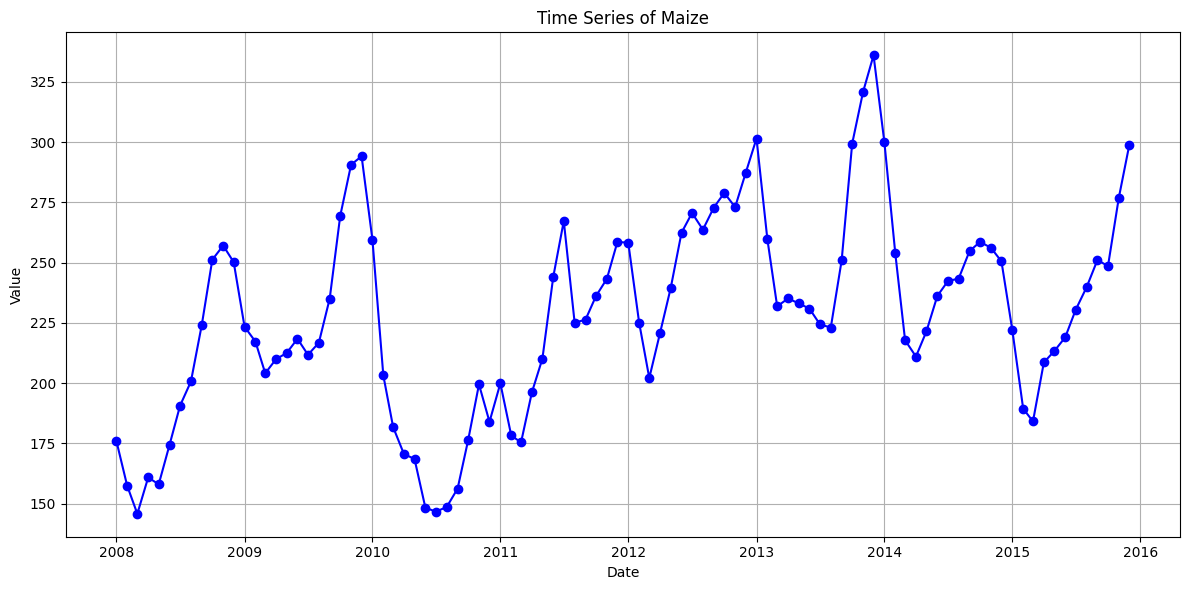

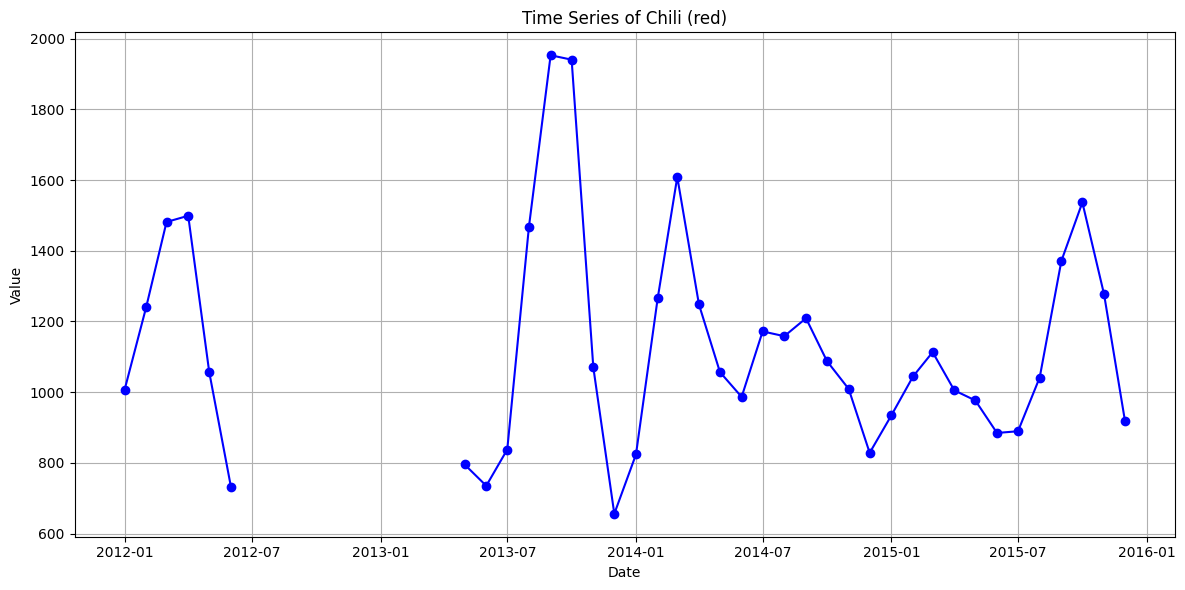

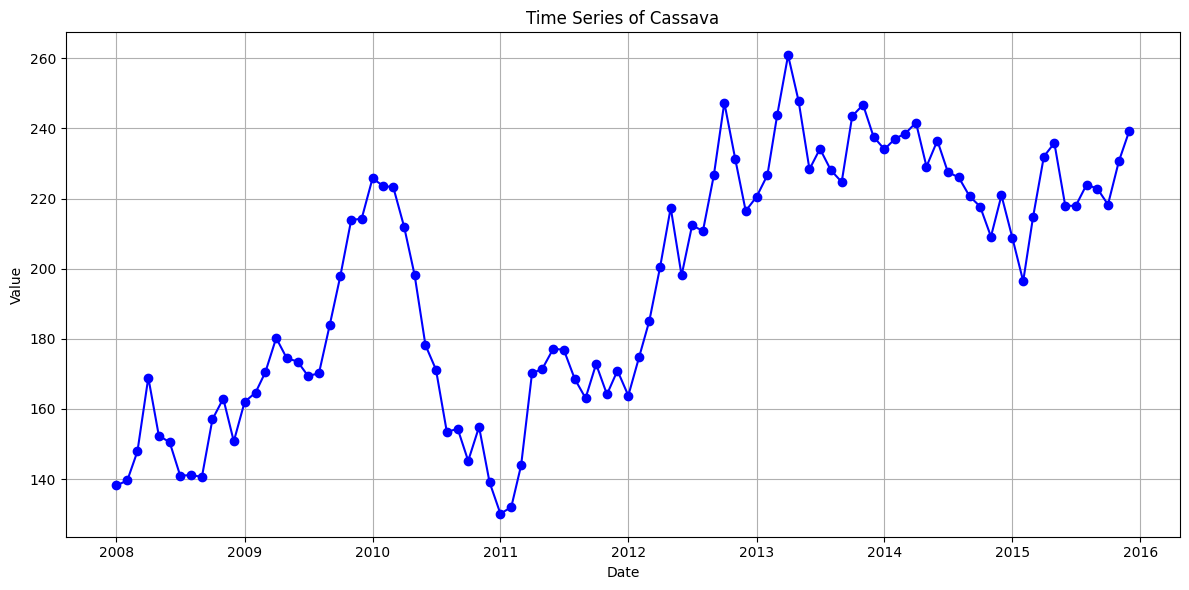

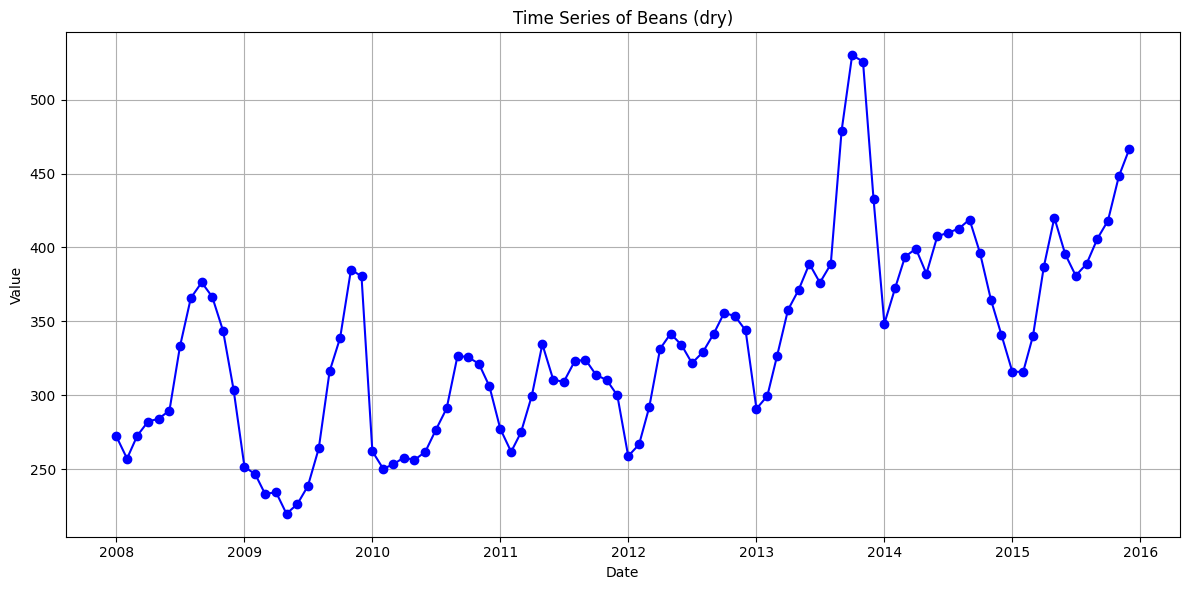

In [31]:
from google.colab import drive
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import traceback
# Task 1
drive.mount('/content/drive')
filenames = [
    'Tomatoes.csv',
    'Sorghum.csv',
    'Potatoes (Irish).csv',
    'Peas (fresh).csv',
    'Oranges (big size).csv',
    'Maize.csv',
    'Chili (red).csv',
    'Cassava.csv',
    'Beans (dry).csv'
]

directory = '/content/drive/MyDrive/Final Exam/data'
df_list = []
for filename in filenames:
    file_path = os.path.join(directory, filename)
    try:
        df = pd.read_csv(file_path)
        print(f"\nProcessing {filename}")
        print(f"Columns: {df.columns.tolist()}")
        if 'mp_year' not in df.columns or 'mp_month' not in df.columns:
            print(f"Columns 'mp_year' or 'mp_month' not found in {filename}.")
            continue
        df['mp_year'] = pd.to_numeric(df['mp_year'], errors='coerce')
        df['mp_month'] = pd.to_numeric(df['mp_month'], errors='coerce')
        df.dropna(subset=['mp_year', 'mp_month'], inplace=True)
        df['mp_year'] = df['mp_year'].astype(int)
        df['mp_month'] = df['mp_month'].astype(int)
        df.rename(columns={'mp_year':'year', 'mp_month':'month'}, inplace=True)
        df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')
        df.dropna(subset=['date'], inplace=True)
        df.set_index('date', inplace=True)
        base_name = filename[:-4]
        good_name = base_name.strip()
        if 'mp_price' not in df.columns:
            print(f"Column 'mp_price' not found in {filename}.")
            continue
        df['mp_price'] = pd.to_numeric(df['mp_price'], errors='coerce')
        df.dropna(subset=['mp_price'], inplace=True)
        df_grouped = df.groupby('date')['mp_price'].mean().rename(good_name)
        df_list.append(df_grouped)

    except Exception as e:
        print(f"An error occurred while processing {file_path}:")
        traceback.print_exc()
if not df_list:
    print("\nNo data was processed. The df_list is empty.")
else:
    combined_df = pd.concat(df_list, axis=1)
    print("\nCombined DataFrame:")
    print(combined_df)
# Task 2
%matplotlib inline
print("Shape of the DataFrame:", combined_df.shape)
print("\nColumn Names and Data Types:")
print(combined_df.dtypes)
if not isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.index = pd.to_datetime(combined_df.index)
print("\nDate Range:")
print("Start Date:", combined_df.index.min())
print("End Date:", combined_df.index.max())
date_range = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max(), freq='MS')
is_continuous = combined_df.index.equals(date_range)

print("\nIs the date index continuous (monthly) without gaps?", is_continuous)
print("\nMissing Values per Column:")
print(combined_df.isnull().sum())
print("\nPercentage of Missing Values per Column:")
missing_percentage = combined_df.isnull().mean() * 100
print(missing_percentage)
print("\nDescriptive Statistics:")
summary_stats = combined_df.describe()
print(summary_stats)
additional_stats = combined_df.agg(['mean', 'median', 'min', 'max', 'std'])
print("\nAdditional Summary Statistics:")
print(additional_stats)
for column in combined_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df.index, combined_df[column], marker='o', color='blue') # Changed line color to blue
    plt.title(f"Time Series of {column}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

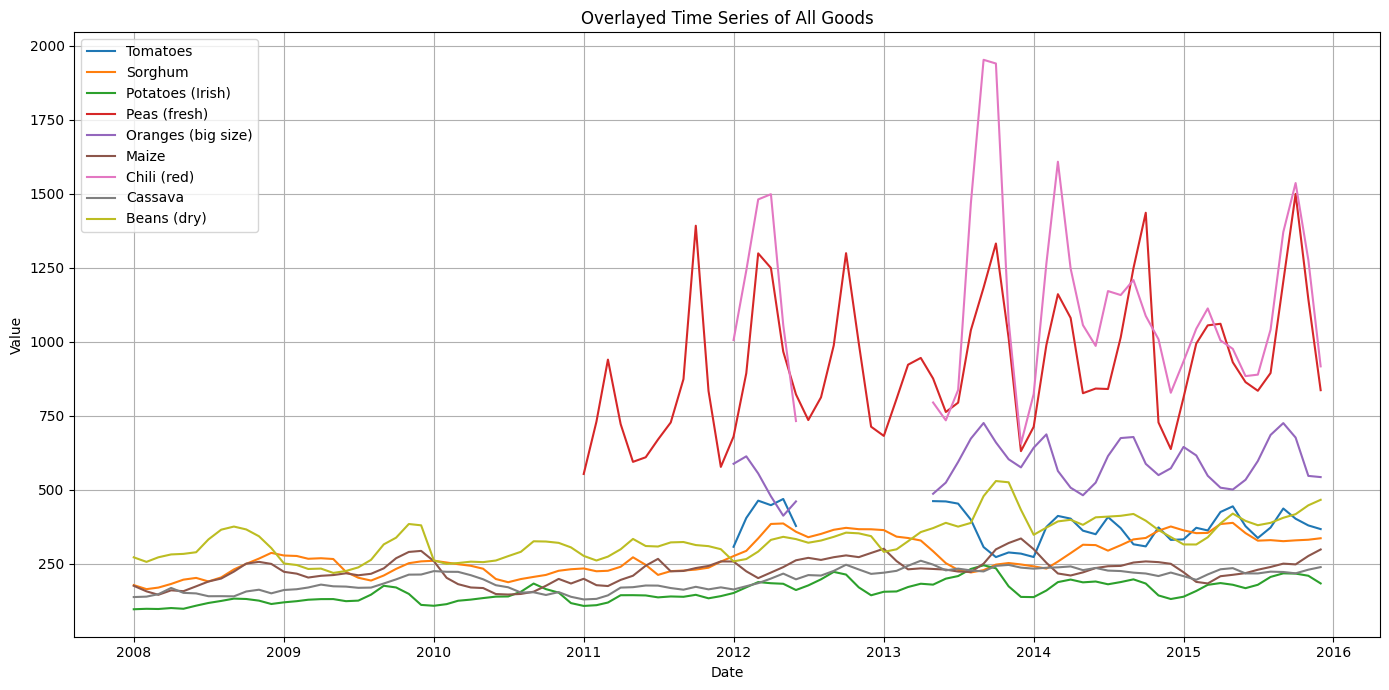

In [32]:
plt.figure(figsize=(14, 7))

for column in combined_df.columns:
    plt.plot(combined_df.index, combined_df[column], label=column)

plt.title("Overlayed Time Series of All Goods")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Task 3

In [33]:
missing_values_count = combined_df.isnull().sum()
print("Missing values per column:")
print(missing_values_count)


Missing values per column:
Tomatoes              58
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    58
Maize                  0
Chili (red)           58
Cassava                0
Beans (dry)            0
dtype: int64


In [35]:
total_entries = combined_df.shape[0]
missing_percentage = (missing_values_count / total_entries) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)



Percentage of missing values per column:
Tomatoes              60.416667
Sorghum                0.000000
Potatoes (Irish)       0.000000
Peas (fresh)          37.500000
Oranges (big size)    60.416667
Maize                  0.000000
Chili (red)           60.416667
Cassava                0.000000
Beans (dry)            0.000000
dtype: float64


In [37]:
combined_df_interpolated = combined_df.interpolate(method='linear')
missing_values_after = combined_df_interpolated.isnull().sum()
print("\nMissing values per column after interpolation:")
print(missing_values_after)



Missing values per column after interpolation:
Tomatoes              48
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    48
Maize                  0
Chili (red)           48
Cassava                0
Beans (dry)            0
dtype: int64


In [39]:
combined_df_ffill = combined_df_interpolated.fillna(method='ffill')
combined_df_filled = combined_df_ffill.fillna(method='bfill')
final_missing_values = combined_df_filled.isnull().sum()
print("\nMissing values per column after forward-fill and backward-fill:")
print(final_missing_values)



Missing values per column after forward-fill and backward-fill:
Tomatoes              0
Sorghum               0
Potatoes (Irish)      0
Peas (fresh)          0
Oranges (big size)    0
Maize                 0
Chili (red)           0
Cassava               0
Beans (dry)           0
dtype: int64


<ipython-input-39-70d604dbcdfd>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_ffill = combined_df_interpolated.fillna(method='ffill')
<ipython-input-39-70d604dbcdfd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_filled = combined_df_ffill.fillna(method='bfill')


In [41]:
combined_df = combined_df_filled


In [42]:
print("\nFinal check for missing values:")
print(combined_df.isnull().sum())



Final check for missing values:
Tomatoes              0
Sorghum               0
Potatoes (Irish)      0
Peas (fresh)          0
Oranges (big size)    0
Maize                 0
Chili (red)           0
Cassava               0
Beans (dry)           0
dtype: int64


<Axes: title={'center': 'After Filling Missing Values'}, xlabel='date'>

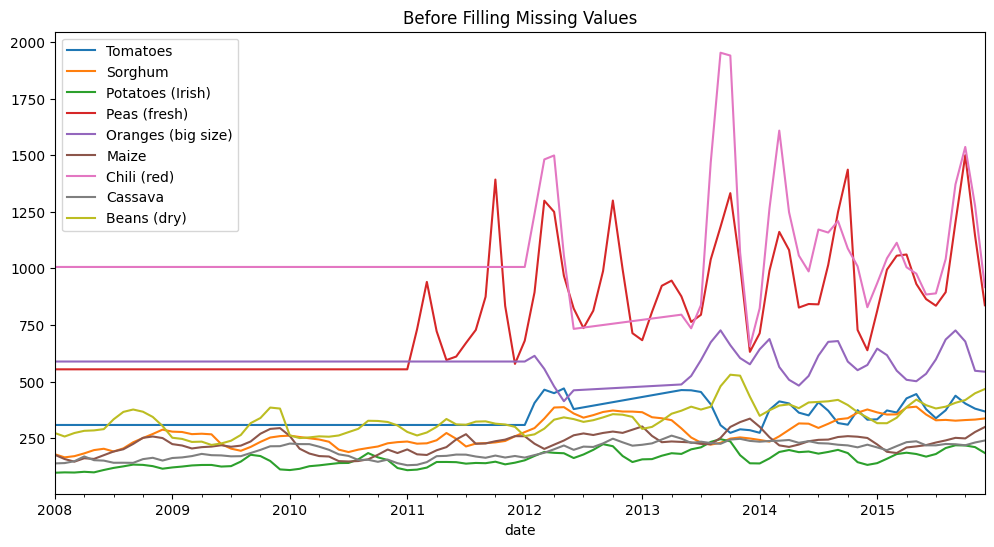

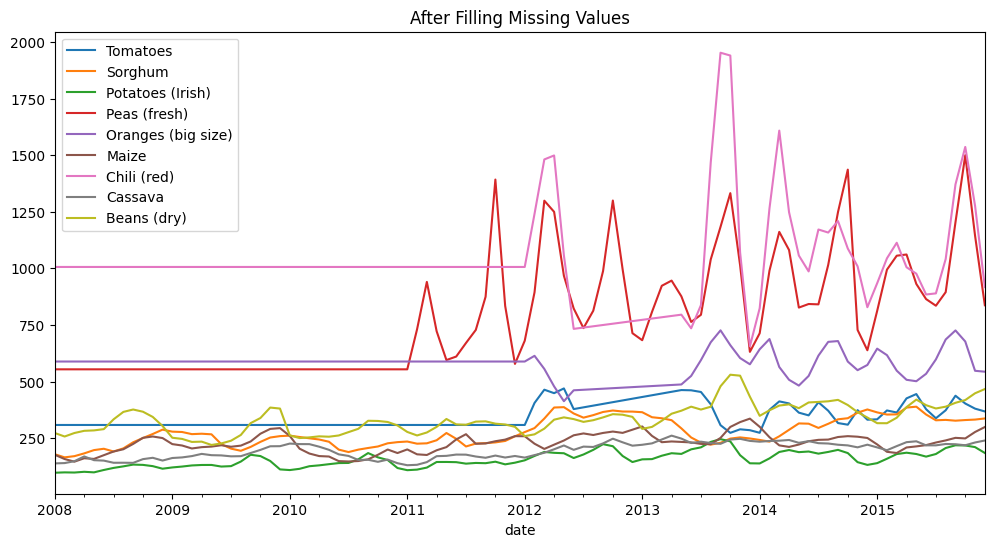

In [44]:
combined_df.plot(figsize=(12, 6), title='Before Filling Missing Values')
combined_df_filled.plot(figsize=(12, 6), title='After Filling Missing Values')


In [45]:
combined_df_spline = combined_df.interpolate(method='spline', order=3)


In [46]:
combined_df_mean = combined_df.fillna(combined_df.mean())


Task 4

In [47]:
correlation_matrix = combined_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Tomatoes   Sorghum  Potatoes (Irish)  Peas (fresh)  \
Tomatoes            1.000000  0.666590          0.581933      0.512554   
Sorghum             0.666590  1.000000          0.494535      0.529379   
Potatoes (Irish)    0.581933  0.494535          1.000000      0.737929   
Peas (fresh)        0.512554  0.529379          0.737929      1.000000   
Oranges (big size) -0.502082 -0.469462         -0.047927      0.003365   
Maize               0.185443  0.458661          0.382097      0.320217   
Chili (red)        -0.038349 -0.120188          0.373943      0.476780   
Cassava             0.572553  0.609231          0.669918      0.552224   
Beans (dry)         0.274086  0.333250          0.684833      0.583496   

                    Oranges (big size)     Maize  Chili (red)   Cassava  \
Tomatoes                     -0.502082  0.185443    -0.038349  0.572553   
Sorghum                      -0.469462  0.458661    -0.120188  0.609231   
Potatoes (Iris

In [48]:
corr_unstacked = correlation_matrix.unstack()
corr_df = corr_unstacked.reset_index()
corr_df.columns = ['Good_1', 'Good_2', 'Correlation']
corr_df = corr_df[corr_df['Good_1'] != corr_df['Good_2']]
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df_sorted = corr_df.sort_values(by='Abs_Correlation', ascending=False)
most_correlated_pair = corr_df_sorted.iloc[0]
print("\nMost Correlated Pair of Goods:")
print(most_correlated_pair[['Good_1', 'Good_2', 'Correlation']])



Most Correlated Pair of Goods:
Good_1             Peas (fresh)
Good_2         Potatoes (Irish)
Correlation            0.737929
Name: 29, dtype: object


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


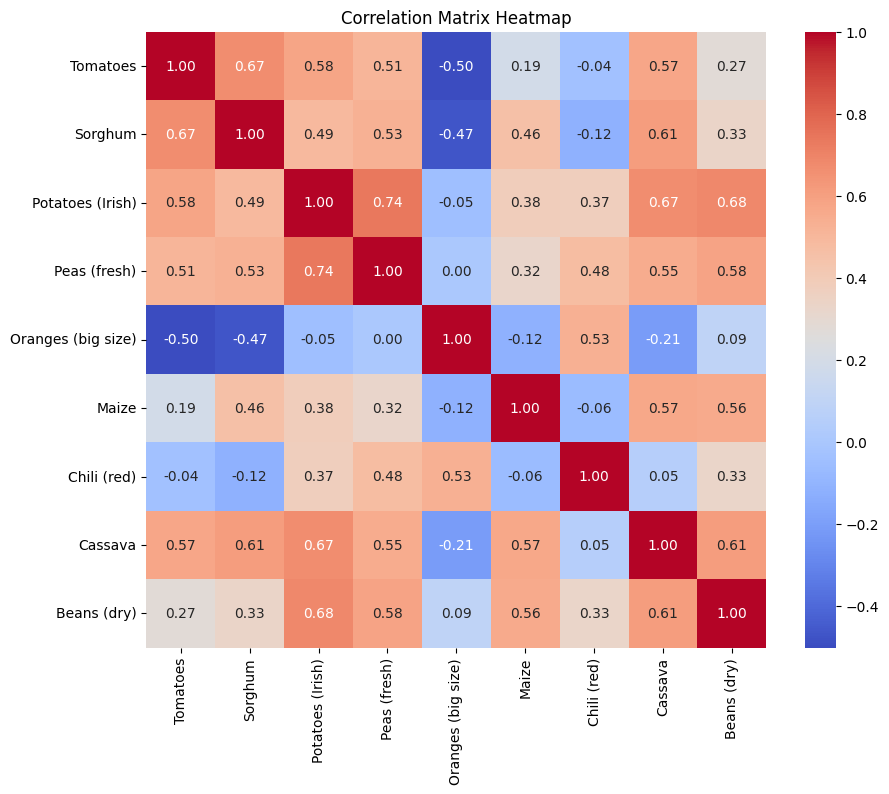

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


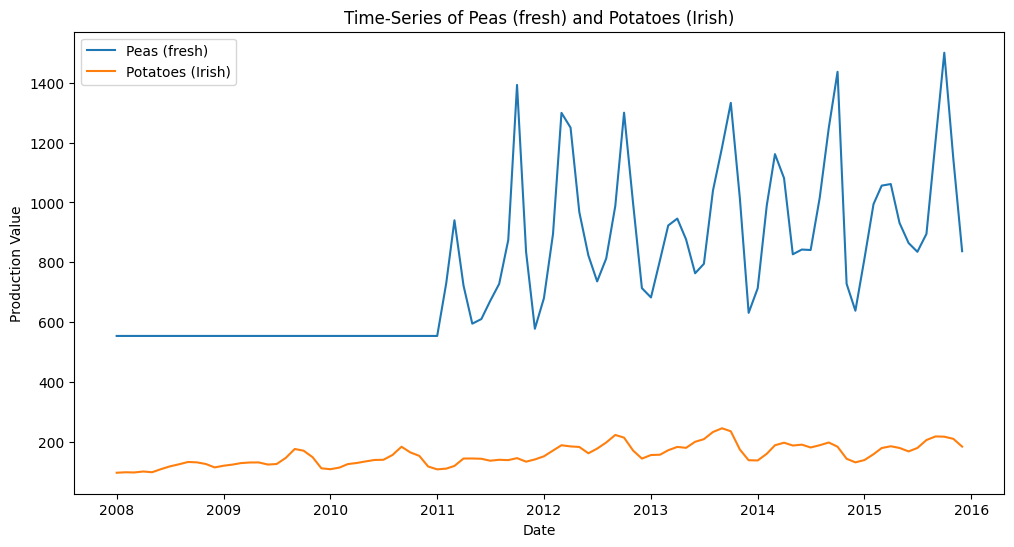

In [52]:
good_1 = most_correlated_pair['Good_1']
good_2 = most_correlated_pair['Good_2']
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df[good_1], label=good_1)
plt.plot(combined_df.index, combined_df[good_2], label=good_2)
plt.title(f'Time-Series of {good_1} and {good_2}')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.legend()
plt.show()


Task 5

In [53]:
good = 'Tomatoes'
data = combined_df[[good]].copy()


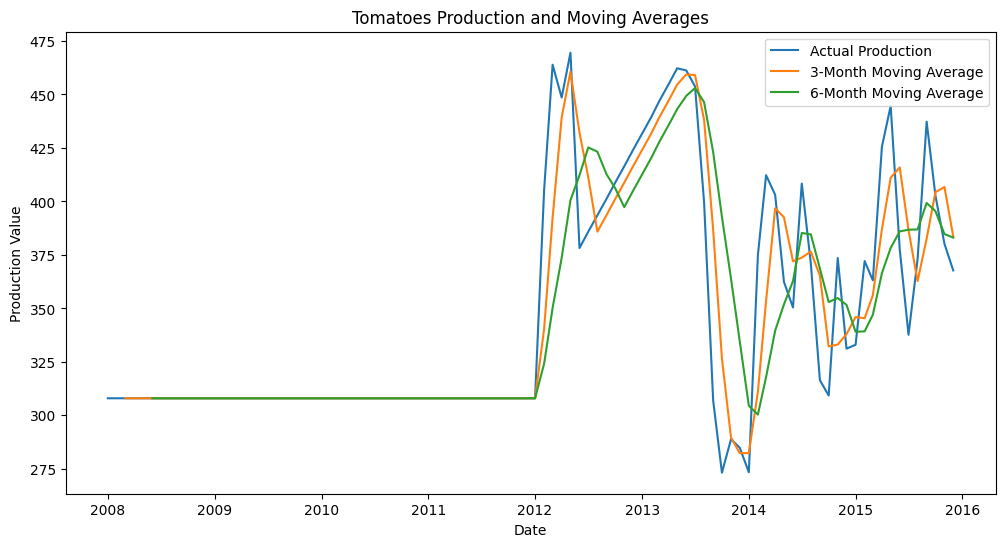

In [54]:
data['MA_3'] = data[good].rolling(window=3).mean()
data['MA_6'] = data[good].rolling(window=6).mean()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data[good], label='Actual Production')
plt.plot(data.index, data['MA_3'], label='3-Month Moving Average')
plt.plot(data.index, data['MA_6'], label='6-Month Moving Average')
plt.title(f'{good} Production and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.legend()
plt.show()


<ipython-input-55-a8cd96c5b59f>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=6, freq='M')


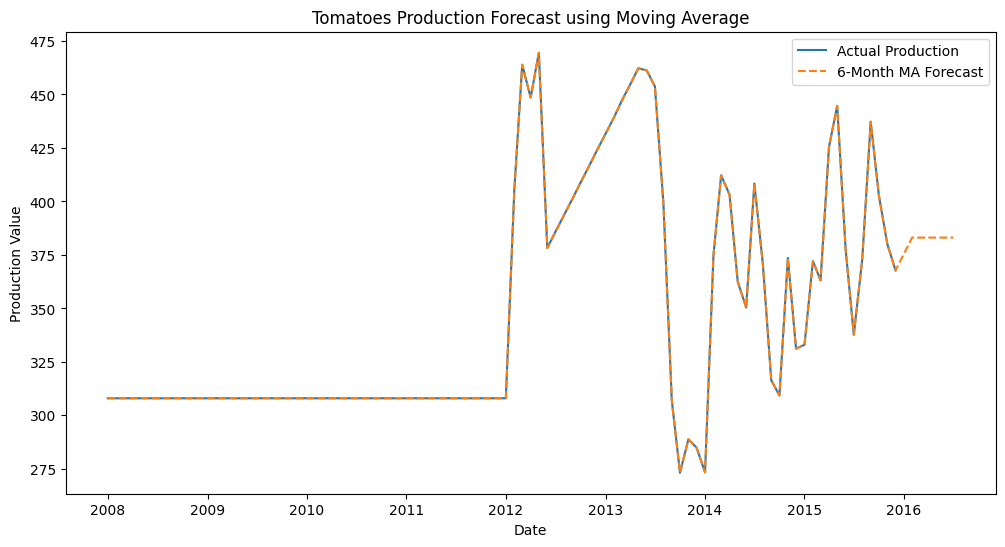

In [55]:
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=6, freq='M')
last_ma6 = data['MA_6'].iloc[-1]
ma_forecast = pd.DataFrame(index=future_dates, columns=[good])
ma_forecast[good] = last_ma6
data_ma_forecast = pd.concat([data, ma_forecast])
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[good], label='Actual Production')
plt.plot(data_ma_forecast.index, data_ma_forecast[good], label='6-Month MA Forecast', linestyle='--')
plt.title(f'{good} Production Forecast using Moving Average')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.legend()
plt.show()


In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [57]:
model = ExponentialSmoothing(data[good], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = model.fit()
hw_forecast = hw_fit.forecast(6)
hw_forecast_df = hw_forecast.to_frame(name='HW_Forecast')


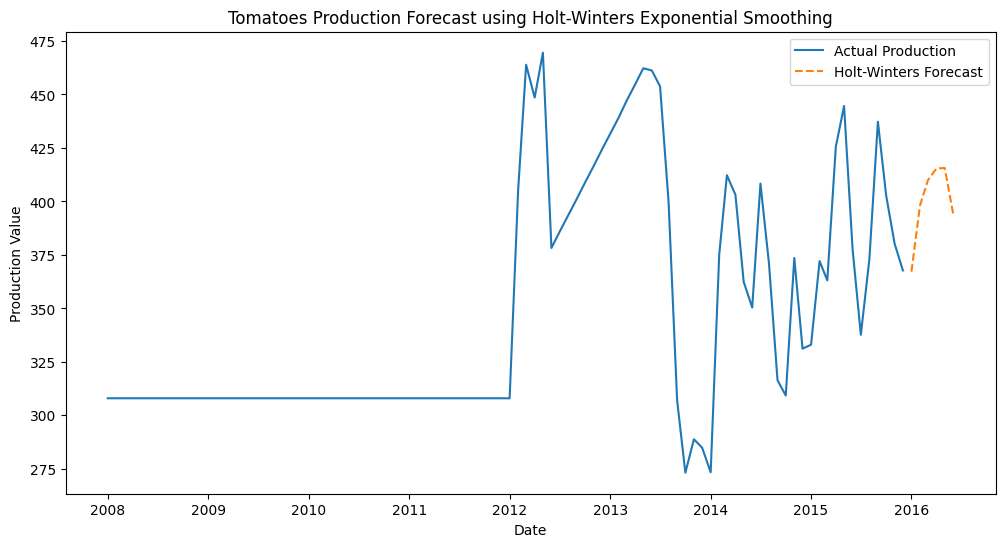

In [59]:
data_hw_forecast = pd.concat([data, hw_forecast_df])
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[good], label='Actual Production')
plt.plot(data_hw_forecast.index, data_hw_forecast['HW_Forecast'], label='Holt-Winters Forecast', linestyle='--')
plt.title(f'{good} Production Forecast using Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.legend()
plt.show()


In [61]:
!pip install prophet
from prophet import Prophet


In [64]:
prophet_data = data.reset_index()

In [67]:
prophet_data = prophet_data.rename(columns={'date': 'ds', good: 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=6, freq='M')
prophet_forecast = prophet_model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp653pn98d/k0vz28h9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp653pn98d/cbs_lgnq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2300', 'data', 'file=/tmp/tmp653pn98d/k0vz28h9.json', 'init=/tmp/tmp653pn98d/cbs_lgnq.json', 'output', 'file=/tmp/tmp653pn98d/prophet_model5tbf1v23/prophet_model-20241126010610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:06:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

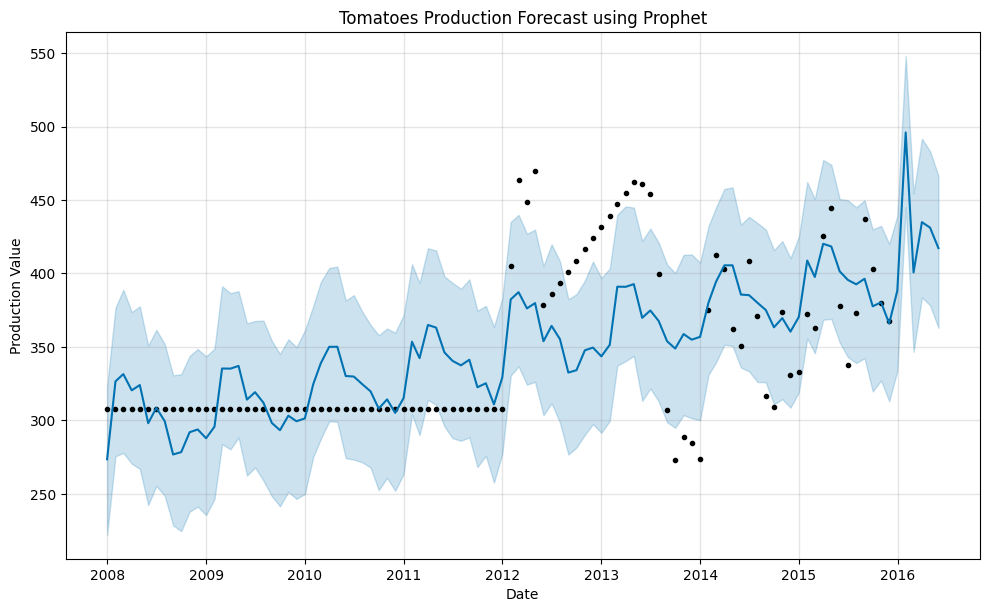

In [68]:
prophet_model.plot(prophet_forecast)
plt.title(f'{good} Production Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.show()


In [69]:
prophet_forecast_future = prophet_forecast[['ds', 'yhat']].set_index('ds').iloc[-6:]

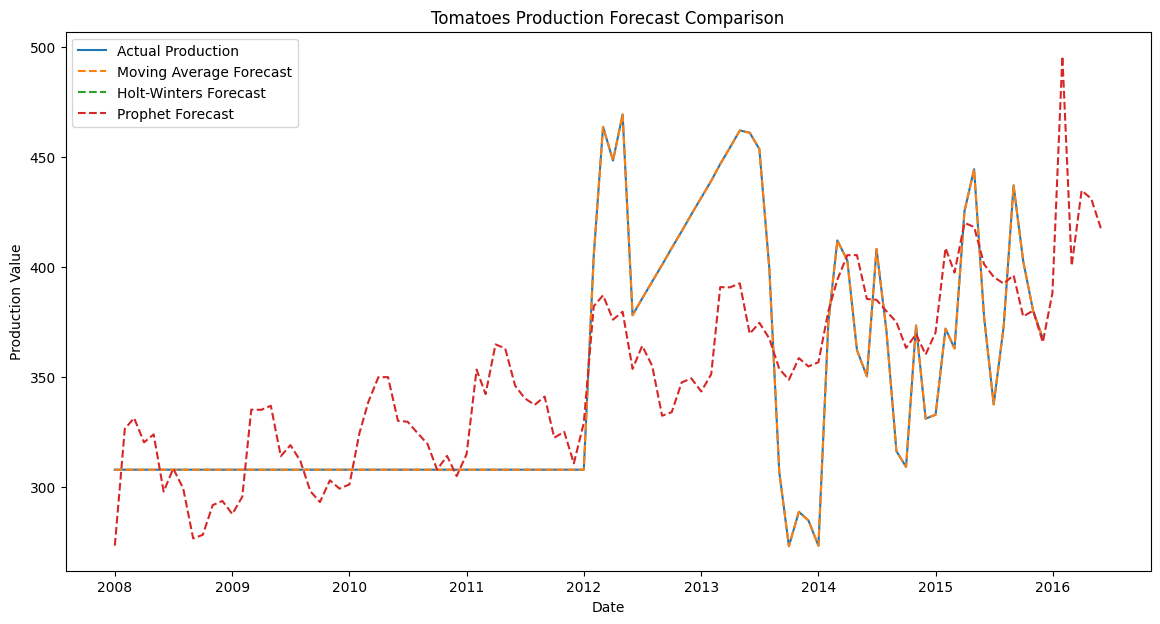

In [70]:
forecast_df = data.copy()
forecast_df['MA_Forecast'] = data_ma_forecast[good]
forecast_df['HW_Forecast'] = data_hw_forecast['HW_Forecast']
forecast_df = forecast_df.join(prophet_forecast.set_index('ds')[['yhat']], how='outer')
forecast_df.rename(columns={'yhat': 'Prophet_Forecast'}, inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(forecast_df.index, forecast_df[good], label='Actual Production')
plt.plot(forecast_df.index, forecast_df['MA_Forecast'], label='Moving Average Forecast', linestyle='--')
plt.plot(forecast_df.index, forecast_df['HW_Forecast'], label='Holt-Winters Forecast', linestyle='--')
plt.plot(forecast_df.index, forecast_df['Prophet_Forecast'], label='Prophet Forecast', linestyle='--')
plt.title(f'{good} Production Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.legend()
plt.show()


In [71]:
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
